In [1]:
# Mid Level A uzduočiai alikti, (vizualizuoti Lietuvos savivaldybes pagal jų antrinio sergamumo (prevalence) 
# rangą padieniui didžiausio sergamumo 30 dienų laikotarpiu) buvo susikelti iš Agreguoti_COVID19.xlsx duomenys.   
# Gyventojų skaičiaus kitimas padieniui nėra skelbiamas, skelbiama kas mėnesį, todėl buvo naudojami gimusių ir mirusių 
# duomenys. Nustačius kad dižiausi susirgimų skaičiai yra 2022 metų vasarį, šiam mėnesiui buvo paskaičiuotas
# gyventojų skaičiaus kitimas padieniui, panaudojant interpoliaciją. Imigracijos duomenys į skaičiavimus nebuvo įtraukti.


In [ ]:
import numpy as np
import matplotlib.dates as mdates
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import pandas as pd

In [107]:
df = pd.read_excel('Agreguoti_COVID19.xlsx')

In [3]:
#  'date' stulpelį paverčiame į datetime formatą
df['date'] = pd.to_datetime(df['date'])

# sugrupuojame pagal savivaldybes ir datą, tada susumuojame atevejus 
daily_incidences = df.groupby(['municipality_name', 'date']).agg({'incidence': 'sum'}).reset_index()

# pervadiname stulpelius
daily_incidences.rename(columns={'incidence': 'total_incidence'}, inplace=True)

In [81]:

# Atvejų skaičius per mėnesį tenkantis kiekvienai savivaldybei 
monthly_incidences = df.groupby([pd.Grouper(key='date', freq='M'), 'municipality_name'])[
    'incidence'].sum().reset_index()
print(monthly_incidences)

           date   municipality_name  incidence
0    2020-02-29     Akmenės r. sav.          0
1    2020-02-29     Alytaus m. sav.          0
2    2020-02-29     Alytaus r. sav.          0
3    2020-02-29    Anykščių r. sav.          0
4    2020-02-29       Birštono sav.          0
...         ...                 ...        ...
3228 2024-06-30     Šiaulių r. sav.          4
3229 2024-06-30     Šilalės r. sav.          1
3230 2024-06-30     Šilutės r. sav.          7
3231 2024-06-30    Širvintų r. sav.          1
3232 2024-06-30  Švenčionių r. sav.          1

[3233 rows x 3 columns]


In [82]:

# Visas Atvejų skaičius per mėnesį 
total_monthly_incidences = monthly_incidences.groupby('date')['incidence'].sum().reset_index()
print(total_monthly_incidences)

         date  incidence
0  2020-02-29          0
1  2020-03-31        397
2  2020-04-30        920
3  2020-05-31        295
4  2020-06-30        141
5  2020-07-31        279
6  2020-08-31        858
7  2020-09-30       2011
8  2020-10-31      11978
9  2020-11-30      46888
10 2020-12-31      84095
11 2021-01-31      36892
12 2021-02-28      14646
13 2021-03-31      17610
14 2021-04-30      31873
15 2021-05-31      26243
16 2021-06-30       4058
17 2021-07-31       4243
18 2021-08-31      16767
19 2021-09-30      34347
20 2021-10-31      78487
21 2021-11-30      62628
22 2021-12-31      50972
23 2022-01-31     188846
24 2022-02-28     255989
25 2022-03-31     142345
26 2022-04-30      36456
27 2022-05-31       4820
28 2022-06-30       6509
29 2022-07-31      22122
30 2022-08-31      35548
31 2022-09-30      32200
32 2022-10-31      17196
33 2022-11-30       8029
34 2022-12-31      11793
35 2023-01-31       8427
36 2023-02-28       8297
37 2023-03-31       9373
38 2023-04-30       3915


In [85]:
# surandamas kurį mėnesį yra didžiausias susirgimo atvejų skaičius savivaldybėse
highest_incidence_month = total_monthly_incidences.loc[total_monthly_incidences['incidence'].idxmax()]
# print(highest_incidence_month)


# didžiausias susirgimo atvejų skaičius tą mėnesį savivaldybėse, kiekviną dieną
filtered_daily_incidences = daily_incidences[
    daily_incidences['date'].dt.strftime('%Y-%m') == highest_incidence_month_date.strftime('%Y-%m')]
# print(filtered_daily_incidences)

        municipality_name       date  total_incidence
629       Akmenės r. sav. 2022-02-01              202
630       Akmenės r. sav. 2022-02-02               96
631       Akmenės r. sav. 2022-02-03               45
632       Akmenės r. sav. 2022-02-04               49
633       Akmenės r. sav. 2022-02-05               45
...                   ...        ...              ...
81764  Švenčionių r. sav. 2022-02-24               31
81765  Švenčionių r. sav. 2022-02-25               36
81766  Švenčionių r. sav. 2022-02-26                2
81767  Švenčionių r. sav. 2022-02-27                4
81768  Švenčionių r. sav. 2022-02-28               43

[1692 rows x 3 columns]


In [86]:
# suskaičiuojamas vasario mėnesio didžiausias susirgimo atvejų skaičius savivaldybėse padieniui
municipalities_total_incidence = filtered_daily_incidences.groupby('municipality_name')['total_incidence'].sum().reset_index()

# print(municipalities_total_incidence)

     municipality_name  total_incidence
0      Akmenės r. sav.             1402
1      Alytaus m. sav.             4814
2      Alytaus r. sav.              932
3     Anykščių r. sav.             1468
4        Birštono sav.              162
..                 ...              ...
56     Šiaulių r. sav.             2378
57     Šilalės r. sav.             1397
58     Šilutės r. sav.             3564
59    Širvintų r. sav.             1173
60  Švenčionių r. sav.             1499

[61 rows x 2 columns]


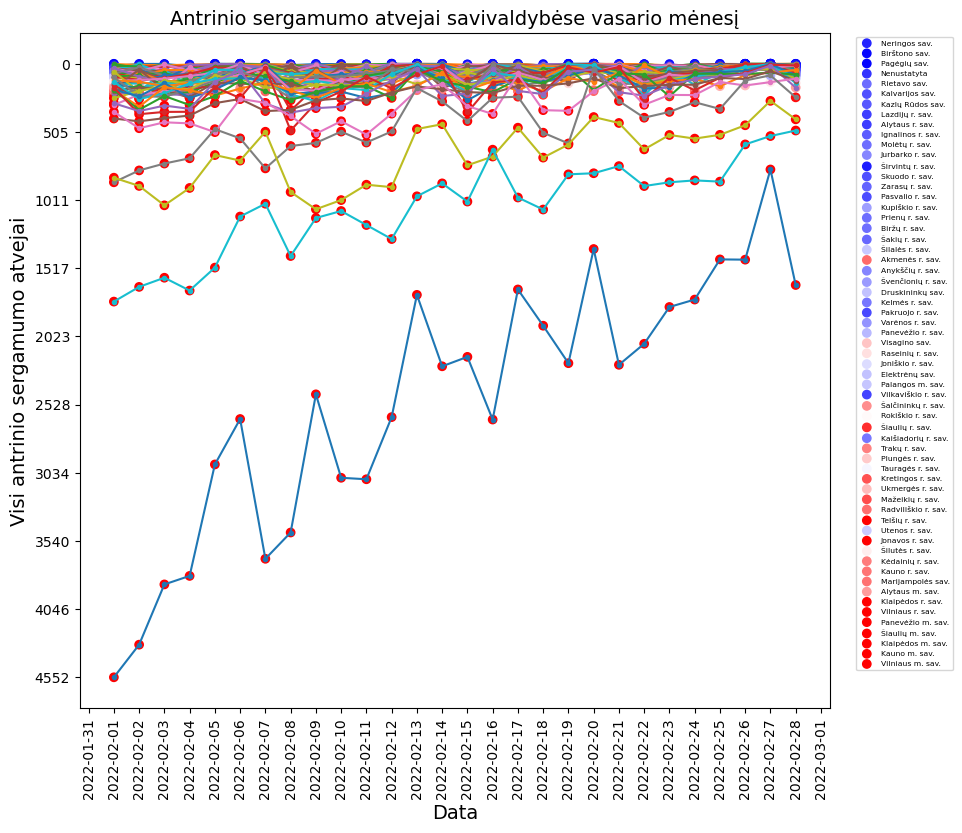

In [142]:

# Surūšiuojamos savivaldybės pagal susirgimų skaičių
sorted_municipalities = municipalities_total_incidence.sort_values(by='total_incidence')

# grafikas
fig, ax = plt.subplots(figsize=(10, 9))
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["blue", "white", "red"])

# surandami atvejai atitinkantys savivaldybes surūšiuotame savivaldybių sąraše
for municipality in sorted_municipalities['municipality_name']:
    municipality_df = filtered_daily_incidences[filtered_daily_incidences['municipality_name'] == municipality]

    # Grafike atidedami taškai sujungti linijomis, vaizduojantys susirgimo atvejus savivaldybėse 
    ax.scatter(municipality_df['date'], municipality_df['total_incidence'],
               c=cmap(municipality_df['total_incidence']),
               label=municipality)
    

    # Taškai grafike sujungiami linija
    ax.plot(municipality_df['date'], municipality_df['total_incidence'], linestyle="-", marker=".")


# Ašių nustatymas
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())
#  y-ašies apvertimas, kad viršuje yra didžiausia vertė
ax.invert_yaxis()

# Ašių nustatymas
y_ticks = np.linspace(0, max(filtered_daily_incidences['total_incidence']), 10)
y_tick_labels = ['{}'.format(int(tick)) for tick in y_ticks]
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)

ax.set_xlabel('Data', fontsize=14)
ax.set_ylabel('Visi antrinio sergamumo atvejai', fontsize=14)
ax.legend(loc='upper left', bbox_to_anchor=(1.03, 1), title_fontsize='small', fontsize=5.5)
ax.set_title('Antrinio sergamumo atvejai savivaldybėse vasario mėnesį', fontsize=14)
ax.tick_params(axis='x', rotation=90)

plt.subplots_adjust(left=0.1, bottom=0.15, right=0.85, top=0.9, wspace=0.5, hspace=0.05)
# plt.savefig("Sergamumas_savivaldybese.png")
plt.show()

In [34]:

# print(filtered_daily_incidences)

        municipality_name  total_incidence formatted_date
629       Akmenės r. sav.              202     2022-02-01
630       Akmenės r. sav.               96     2022-02-02
631       Akmenės r. sav.               45     2022-02-03
632       Akmenės r. sav.               49     2022-02-04
633       Akmenės r. sav.               45     2022-02-05
...                   ...              ...            ...
81764  Švenčionių r. sav.               31     2022-02-24
81765  Švenčionių r. sav.               36     2022-02-25
81766  Švenčionių r. sav.                2     2022-02-26
81767  Švenčionių r. sav.                4     2022-02-27
81768  Švenčionių r. sav.               43     2022-02-28

[1692 rows x 3 columns]


In [109]:
# population_df = pd.read_excel('/Users/daivadaugelaite/population_df.xlsx')
population_df = pd.read_excel('population_df.xlsx')

In [63]:
# pervadinami stulpeliai, pašsalinamas 'Day_' prefiksas 
population_df.rename(columns=lambda x: x.replace('Day_', ''), inplace=True)
# population_df.to_excel("population_df3.xlsx", index=False)

In [65]:
# print(population_df.head(10))


        Municipalities             1             2             3  \
0  Lietuvos Respublika  2.801124e+06  2.801045e+06  2.800966e+06   
1    Sostinės regionas  8.171257e+05  8.171124e+05  8.170990e+05   
2   Vilniaus apskritis  8.171257e+05  8.171124e+05  8.170990e+05   
3       Elektrėnų sav.  2.348839e+04  2.348779e+04  2.348718e+04   
4   Šalčininkų r. sav.  2.961921e+04  2.961843e+04  2.961764e+04   
5     Širvintų r. sav.  1.484596e+04  1.484493e+04  1.484389e+04   
6   Švenčionių r. sav.  2.239871e+04  2.239743e+04  2.239614e+04   
7        Trakų r. sav.  3.225679e+04  3.225557e+04  3.225436e+04   
8     Ukmergės r. sav.  3.393354e+04  3.393207e+04  3.393061e+04   
9     Vilniaus m. sav.  5.626952e+05  5.626894e+05  5.626836e+05   

              4             5             6           7             8  \
0  2.800887e+06  2.800808e+06  2.800729e+06  2800650.00  2.800571e+06   
1  8.170857e+05  8.170724e+05  8.170591e+05   817045.75  8.170324e+05   
2  8.170857e+05  8.170724e+05  8

In [57]:

import pandas as pd
from datetime import datetime


# pasukta duomenų matrica
pivoted_df7 = filtered_daily_incidences.pivot(index='municipality_name', columns='formatted_date', values='total_incidence')

# Data suformatuojama į formatą MMMM-MM-DD (metai-mėnuo-diena)
def format_date(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d').strftime('%Y-%m-%d')

# stulpelių pavadinimas sudaromas tik is datos
for col in pivoted_df7.columns:
    formatted_col_name = format_date(col)
    pivoted_df7.rename(columns={col: formatted_col_name}, inplace=True)

# Indeksas 'municipality_name' duomenų matricoje paverciamas į paprastą stulpelį 
pivoted_df7.reset_index(inplace=True)




formatted_date   municipality_name  2022-02-01  2022-02-02  2022-02-03  \
0                  Akmenės r. sav.       202.0        96.0        45.0   
1                  Alytaus m. sav.       177.0       375.0       358.0   
2                  Alytaus r. sav.        30.0        58.0        76.0   
3                 Anykščių r. sav.        66.0        76.0        71.0   
4                    Birštono sav.         3.0         9.0        12.0   
..                             ...         ...         ...         ...   
56                 Šiaulių r. sav.       232.0       190.0       185.0   
57                 Šilalės r. sav.       100.0        42.0       109.0   
58                 Šilutės r. sav.       136.0       263.0       220.0   
59                Širvintų r. sav.        14.0        21.0       146.0   
60              Švenčionių r. sav.        77.0        97.0        88.0   

formatted_date  2022-02-04  2022-02-05  2022-02-06  2022-02-07  2022-02-08  \
0                     49.0       

In [66]:

# suradamos savivaldybės kurios yra abiejose (populiacijos ir (sergamumo) pivoted duomenų matricose
common_municipalities = set(pivoted_df7['municipality_name']).intersection(set(population_df['Municipalities']))



In [67]:
# print(common_municipalities)

In [68]:

# Abi duomenų matricos sujungiamos, tik tos, kur savivaldybių eilutės yra abiejose duomenų matricose 

merged_df = pivoted_df7[pivoted_df7['municipality_name'].isin(common_municipalities)].merge(
    population_df[population_df['Municipalities'].isin(common_municipalities)],
    left_on='municipality_name',
    right_on='Municipalities',  
    how='left'
)


In [69]:
print(merged_df)

      municipality_name  2022-02-01  2022-02-02  2022-02-03  2022-02-04  \
0       Akmenės r. sav.       202.0        96.0        45.0        49.0   
1       Alytaus m. sav.       177.0       375.0       358.0       357.0   
2       Alytaus r. sav.        30.0        58.0        76.0        59.0   
3      Anykščių r. sav.        66.0        76.0        71.0       109.0   
4         Birštono sav.         3.0         9.0        12.0         7.0   
5         Biržų r. sav.        55.0        64.0        75.0        79.0   
6      Druskininkų sav.        97.0       115.0        93.0        90.0   
7        Elektrėnų sav.        97.0        84.0       156.0       111.0   
8     Ignalinos r. sav.        46.0         5.0        78.0        43.0   
9       Jonavos r. sav.       256.0       203.0       162.0       192.0   
10     Joniškio r. sav.       110.0        65.0       132.0       125.0   
11     Jurbarko r. sav.        67.0        74.0        91.0        97.0   
12  Kaišiadorių r. sav.  

In [70]:
print(merged_df.columns)

Index(['municipality_name', '2022-02-01', '2022-02-02', '2022-02-03',
       '2022-02-04', '2022-02-05', '2022-02-06', '2022-02-07', '2022-02-08',
       '2022-02-09', '2022-02-10', '2022-02-11', '2022-02-12', '2022-02-13',
       '2022-02-14', '2022-02-15', '2022-02-16', '2022-02-17', '2022-02-18',
       '2022-02-19', '2022-02-20', '2022-02-21', '2022-02-22', '2022-02-23',
       '2022-02-24', '2022-02-25', '2022-02-26', '2022-02-27', '2022-02-28',
       'Municipalities', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10',
       '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', 'Visi', 'Visi_Difference'],
      dtype='object')


In [72]:
# tuscia duomenu matrica normalizuotiems duomenims
normalized_data = pd.DataFrame(index=merged_df.index)

In [73]:
# Skaičiuojami normalizuoti susirgimų atvejai savivaldybėse 
for day in range(1, 29):
    # Atvjų skaičius tam tikrą dieną 
    incidence_case_column = f'2022-02-{day:02d}'
    population_change_column = str(day)
    
    # Skaičiuojami normalizuoti susirgimų atvejai savivaldybėse tenkantys 100,000 gyventojų
     normalized_rate = (merged_df[incidence_case_column] / merged_df[population_change_column]) * 100000
    
    # Store the result in the DataFrame
    normalized_data[incidence_case_column] = normalized_rate

# Įtraukiame į pirmą stulpelį savivaldybes 
normalized_data.insert(0, 'municipality_name', merged_df.iloc[:, 0])


# print(normalized_data.head())

  municipality_name   2022-02-01  2022-02-02  2022-02-03  2022-02-04  \
0   Akmenės r. sav.  1051.478968  499.737861  234.263882  255.100144   
1   Alytaus m. sav.   342.347234  725.327468  692.460785  690.541325   
2   Alytaus r. sav.   118.259557  228.644801  299.616187  232.606602   
3  Anykščių r. sav.   290.630927  334.692234  312.697599  480.094635   
4     Birštono sav.    73.691968  221.075903  294.767870  171.947924   

   2022-02-05  2022-02-06  2022-02-07  2022-02-08  2022-02-09  ...  \
0  234.287404    5.206648  411.345856  348.880458  380.142572  ...   
1  338.507899  493.264930   58.032411  959.489746  564.872997  ...   
2  153.763401  169.541169   27.600891  350.940442  212.939152  ...   
3  462.512861    4.405231   39.650197  299.602837  370.126743  ...   
4   98.255957   24.563989   98.255957  171.947924  466.715795  ...   

   2022-02-19  2022-02-20  2022-02-21  2022-02-22  2022-02-23  2022-02-24  \
0  234.452191   10.420621  255.318040  396.023389  244.921508  276.20

In [143]:
normalized_data.to_excel("normalized_data.xlsx", index=False)

In [94]:
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [75]:

# sukuriama spalvų schema pavadinta "custom_cmap", kuri prasideda nuo mėlynos spalvos ir baigaisi raudona. 
#  Ši schema bus naudojama braižant ir nuspalvinant grafiko taškų reikšmes pagal regionus, 
# mažesnės vertės priskirtos mėlynai, o didesnės – raudonai, atsižvelgiant į atvaizdavimo 
# proceso metu taikomą normalizavimą.
cmap = LinearSegmentedColormap.from_list("custom_cmap", ["blue", "white", "red"])

In [76]:

# Normalizuotų duomenų transformavimas 
transposed_data = normalized_data.T

In [77]:
print(transposed_data)

                                0                1                2   \
municipality_name  Akmenės r. sav.  Alytaus m. sav.  Alytaus r. sav.   
2022-02-01             1051.478968       342.347234       118.259557   
2022-02-02              499.737861       725.327468       228.644801   
2022-02-03              234.263882       692.460785       299.616187   
2022-02-04              255.100144       690.541325       232.606602   
2022-02-05              234.287404       338.507899       153.763401   
2022-02-06                5.206648        493.26493       169.541169   
2022-02-07              411.345856        58.032411        27.600891   
2022-02-08              348.880458       959.489746       350.940442   
2022-02-09              380.142572       564.872997       212.939152   
2022-02-10               312.46164       398.514828       212.948149   
2022-02-11              265.605732       187.654205        63.098414   
2022-02-12               83.331473       354.035619       122.25

In [78]:

# normalizuota duomenų matrica yra transformuojama taip kad stulpeliai išdėstomi eilutėje, tam kad būtų galima vėliau
# panaudoti grafiko braižymui. Kekviena eilutė atitinka vieną matavimą (vertę) kiekvienai datai, kiekvienoje savivaldybėje
reshaped_data = normalized_data.melt(id_vars=['municipality_name'], var_name='date', value_name='value')

# Konvertuojamas 'date' stulpelis į 'datetime' formatą 
reshaped_data['date'] = pd.to_datetime(reshaped_data['date'])


# print(reshaped_data)

       municipality_name       date        value
0        Akmenės r. sav. 2022-02-01  1051.478968
1        Alytaus m. sav. 2022-02-01   342.347234
2        Alytaus r. sav. 2022-02-01   118.259557
3       Anykščių r. sav. 2022-02-01   290.630927
4          Birštono sav. 2022-02-01    73.691968
...                  ...        ...          ...
1647     Šiaulių r. sav. 2022-02-28   167.355779
1648     Šilalės r. sav. 2022-02-28    55.738771
1649     Šilutės r. sav. 2022-02-28   372.473432
1650    Širvintų r. sav. 2022-02-28   303.684708
1651  Švenčionių r. sav. 2022-02-28   192.273296

[1652 rows x 3 columns]


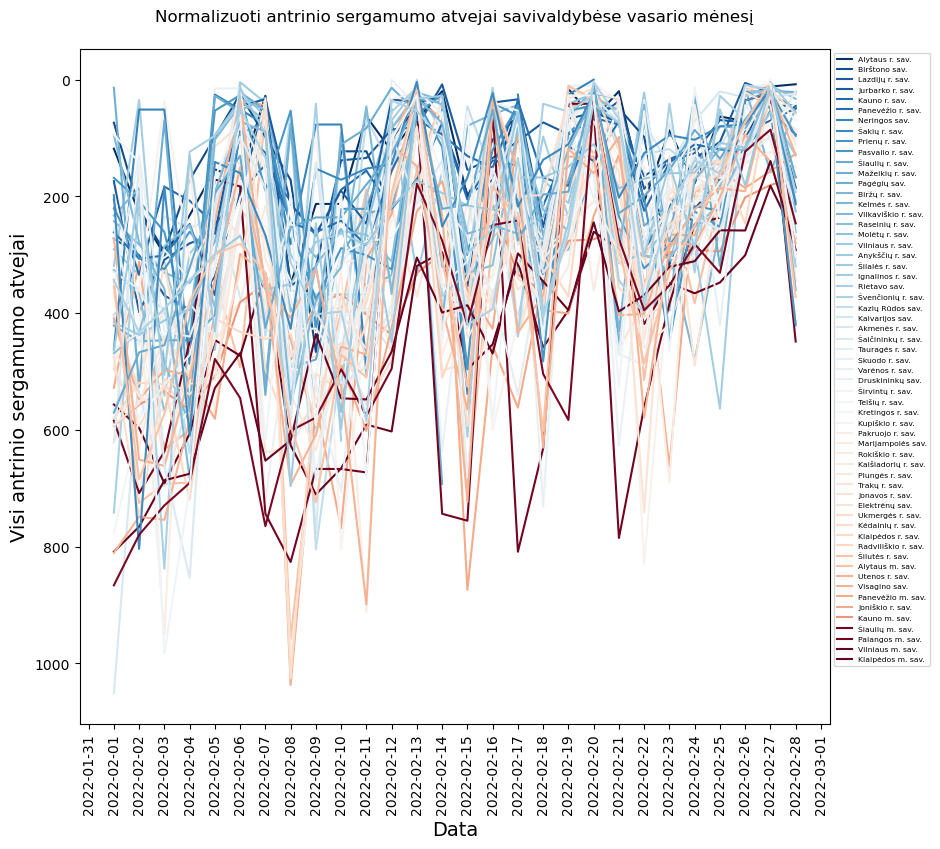

In [138]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.dates import DateFormatter  

# 'date' stulpelis yra datetime formatu
reshaped_data['date'] = pd.to_datetime(reshaped_data['date'])

# grouped_data = reshaped_data.groupby('municipality_name')['value'].mean().reset_index()
# vidurkio skaičiavimui duomenys sugrupuojami pagal savivaldybes ir agreguojami pagal vertę
grouped_data = reshaped_data.groupby('municipality_name')['value'].mean().reset_index()

# tam kad sukurti spalvų gradientą, vertės normalizuojamos nuo 0 iki 1
normalized_values = (grouped_data['value'] - grouped_data['value'].max()) /(grouped_data['value'].min() - grouped_data['value'].max())


# Normalizuotos vertės susiejamos su spalvų gradientu
gradient_colors = plt.cm.get_cmap('RdBu')(normalized_values)


# Sukuriamas grafikas
fig, ax = plt.subplots(figsize=(10, 9))


# Atidedami savivaldybių duomenys pagal spalvas
for municipality, color in zip(grouped_data['municipality_name'], gradient_colors):
    municipality_data = reshaped_data[reshaped_data['municipality_name'] == municipality]
    ax.plot(municipality_data['date'], municipality_data['value'], label=municipality, color=color)

# grafiko pavadinimas
ax.set_title('Normalizuoti antrinio sergamumo atvejai savivaldybėse vasario mėnesį', pad=20)
# Ašių pavadinimai
ax.set_ylabel('Visi antrinio sergamumo atvejai', fontsize=14)
ax.set_xlabel('Data', fontsize=14)

# Spalvų reikšmės atitinkančios savivaldybes
handles, labels = ax.get_legend_handles_labels()
sorted_indices = sorted(range(len(handles)), key=lambda i: normalized_values[i], reverse=True)
sorted_handles = [handles[i] for i in sorted_indices]
sorted_labels = [labels[i] for i in sorted_indices]
ax.invert_yaxis()
ax.legend(sorted_handles, sorted_labels, bbox_to_anchor=(1, 1), title_fontsize='small', fontsize=5.5)


# X ašies nustatymas
ax.xaxis.set_major_locator(plt.MaxNLocator(30))  
ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))  

plt.xticks(rotation=90)
# plt.subplots_adjust(left=0.2, bottom=0.15, right=0.9, top=1, wspace=0.5, hspace=0.05)
plt.subplots_adjust(left=0.1, bottom=0.15, right=0.85, top=0.9, wspace=0.5, hspace=0.05)

# plt.savefig("Normalizuoti_atvejai.png")
plt.show()

